In [34]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

from k_means import KMeans
from voronoi_processing import get_polygons, interpolate_centroid_history

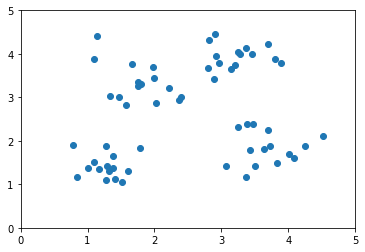

In [35]:
# Generate new synthetic data or load the data used in the Medium post
# data, _ = make_blobs(60, cluster_std=[0.3, 0.4, 0.4, 0.3], center_box=[0.5, 4.5], 
#                      centers=[[1.3, 1.2], [1.8, 3.4], [3.4, 4], [3.8, 1.8]])
data = np.load("data/synth_data.npy")

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.scatter(data[:, 0], data[:, 1])

In [38]:
# Fit the KMeans model or load the previously generated centroid history
k_means = KMeans(4, centroid_init="kmeans++", verbose=True)
k_means.fit(data)
centroid_history = k_means.centroid_history

# centroid_history = np.load("data/centroid_history1.npy")

Iteration: 0
Iteration: 1
Iteration: 2


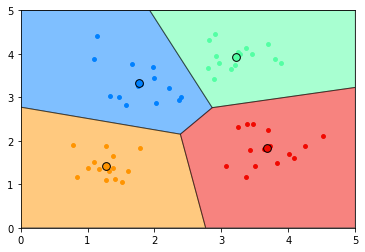

In [30]:
# Visualize the clustered data
cmap = plt.get_cmap("jet")
colors = [
    cmap(0.25),
    cmap(0.45),
    cmap(0.75),
    cmap(0.9),
]  # specific colors I selected for the manim video

# set up the plot
x_lim = [0, 5]
y_lim = [0, 5]

fig = plt.figure()
plt.xlim(*x_lim)
plt.ylim(*y_lim)

def plot_kmeans(centroids, camera: Camera = None):
    # generate the polygons to visualize cluster boundaries
    polygons = get_polygons(centroids, x_lim, y_lim)

    # plot the data
    labels = k_means._compute_labels(data, centroids)
    for i, polygon_coords in enumerate(polygons):
        # plot the data for each centroid
        plt.scatter(*data[labels==i].T, color=colors[i], s=15)
        
        # plot the polygon boundary
        plt.fill(*polygon_coords.T, c=colors[i], alpha=0.5, edgecolor="black")
        
        # plot the centroids
        plt.scatter(
            *centroids[i].T, color=colors[i], edgecolor="black", s=60
        )
    
    if camera:
        camera.snap()

# plot the final point of the history
plot_kmeans(centroid_history[-1])

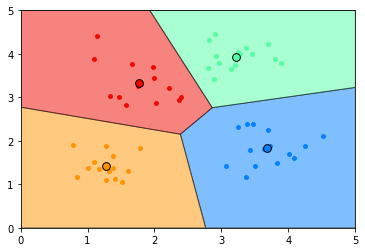

In [40]:
# we can also visualize the progression of the k-means algorithm in video form
# first interpolate the history to a 5 second video at 30 fps
interoplated_centroid_history = interpolate_centroid_history(centroid_history, 150)

# next, recreate the figure
x_lim = [0, 5]
y_lim = [0, 5]

fig = plt.figure()
plt.xlim(*x_lim)
plt.ylim(*y_lim)

# finally, create a Camera and call the function above to save each frame
camera = Camera(fig)
for i in range(len(interoplated_centroid_history)):
    plot_kmeans(interoplated_centroid_history[i], camera=camera)

# save the animation
animation = camera.animate()
animation.save(
    "FILE_PATH_HERE",
    fps=30,
    dpi=150,
    progress_callback=lambda x, _: print(
        f"Writing Frame: {x}/{len(interoplated_centroid_history)}", end="\r"
    )
)